In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
timestamp = 1727708621

In [4]:
tickers = [
    "AAPL",
    "AMZN", 
    "GOOG",
    "BINANCE:BTCUSDT",
    "BINANCE:ETHUSDT"
]

In [5]:
kinds = ["PRICES", "MA", "C"]
names = ["Prices", "Moving Average", "Candlestick"]

/Users/eleft/.local/share/virtualenvs/rtes_final_assignment-ed23yFBF/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


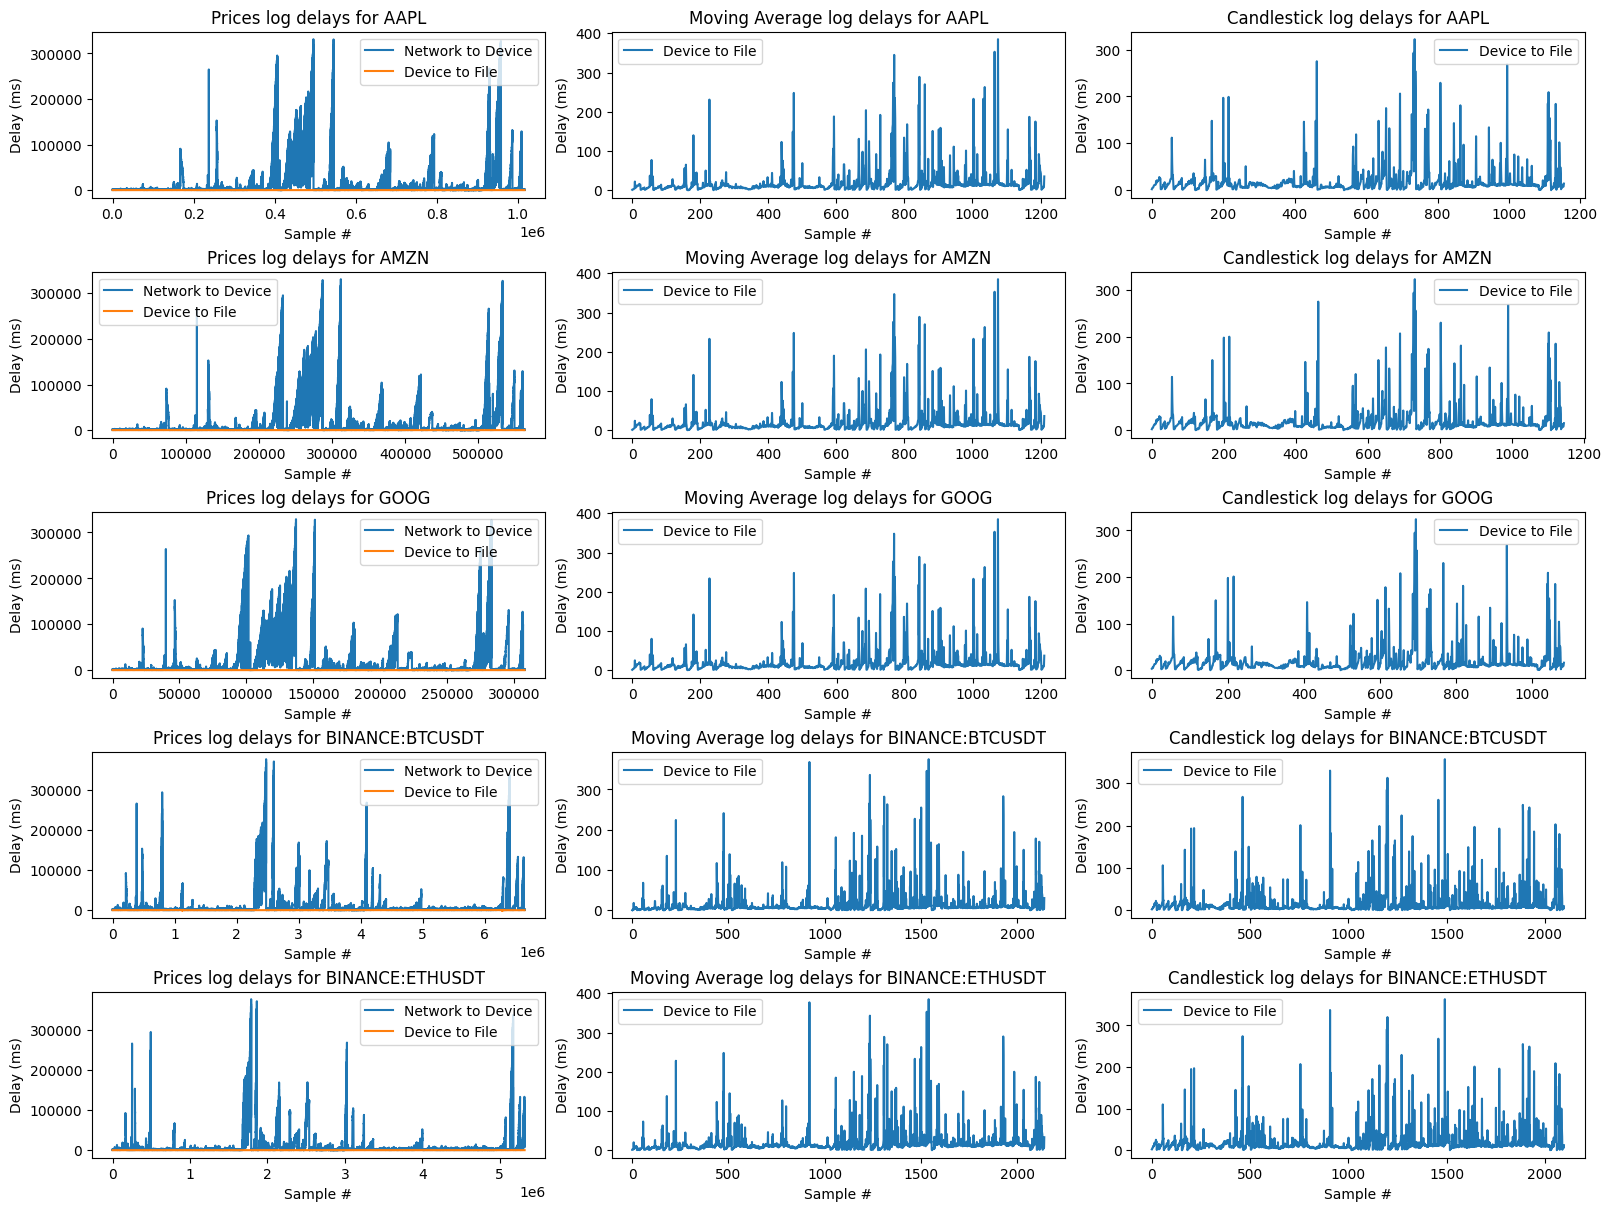

<Figure size 640x480 with 0 Axes>

In [37]:
fig, axs = plt.subplots(len(tickers), len(kinds), figsize=(16, 12), layout="constrained")

for ikind in range(len(kinds)):
    for iticker in range(len(tickers)):
        this_ticker = tickers[iticker]
        this_kind = kinds[ikind]
        this_name = names[ikind]

        if this_kind == "PRICES":
            prices_filename = os.path.join(os.getcwd(), f"out/PRICES_{timestamp}_{this_ticker}.txt")
            data = pd.read_csv(prices_filename, names=["p", "v", "rt", "pt", "wt"], on_bad_lines=lambda x: None, engine="python")

            network_delays = np.array(data["pt"]) - np.array(data["rt"])
            processing_delays = np.array(data["wt"]) - np.array(data["pt"])

            # tructate final 2 entries in case of not properly written data
            network_delays = network_delays[:-2]
            processing_delays = processing_delays[:-2]

            axs[iticker, ikind].plot(network_delays)
            axs[iticker, ikind].plot(processing_delays)
            
            axs[iticker, ikind].set_xlabel("Sample #")
            axs[iticker, ikind].set_ylabel("Delay (ms)")
            axs[iticker, ikind].legend(["Network to Device", "Device to File"])

            axs[iticker, ikind].set_title(f"{this_name} log delays for {this_ticker}")
        elif this_kind == "MA":
            ma_filename = os.path.join(os.getcwd(), f"out/MA_{timestamp}_{this_ticker}.txt")
            data = pd.read_csv(ma_filename, names=["ma", "v", "pt", "wt"])

            processing_delays = np.array(data["wt"]) - np.array(data["pt"])

            # tructate final 2 entries in case of not properly written data
            processing_delays = processing_delays[:-2]

            axs[iticker, ikind].plot(processing_delays)

            axs[iticker, ikind].set_xlabel("Sample #")
            axs[iticker, ikind].set_ylabel("Delay (ms)")
            axs[iticker, ikind].legend(["Device to File"])

            axs[iticker, ikind].set_title(f"{this_name} log delays for {this_ticker}")
        elif this_kind == "C":
            ma_filename = os.path.join(os.getcwd(), f"out/C_{timestamp}_{this_ticker}.txt")
            data = pd.read_csv(ma_filename, names=["o", "h", "l", "c", "v", "pt", "wt"])

            processing_delays = np.array(data["wt"]) - np.array(data["pt"])

            # tructate final 2 entries in case of not properly written data
            processing_delays = processing_delays[:-2]

            axs[iticker, ikind].plot(processing_delays)

            axs[iticker, ikind].set_xlabel("Sample #")
            axs[iticker, ikind].set_ylabel("Delay (ms)")
            axs[iticker, ikind].legend(["Device to File"])

            axs[iticker, ikind].set_title(f"{this_name} log delays for {this_ticker}")

plt.show()
fig.savefig("graphs.png")

/Users/eleft/.local/share/virtualenvs/rtes_final_assignment-ed23yFBF/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


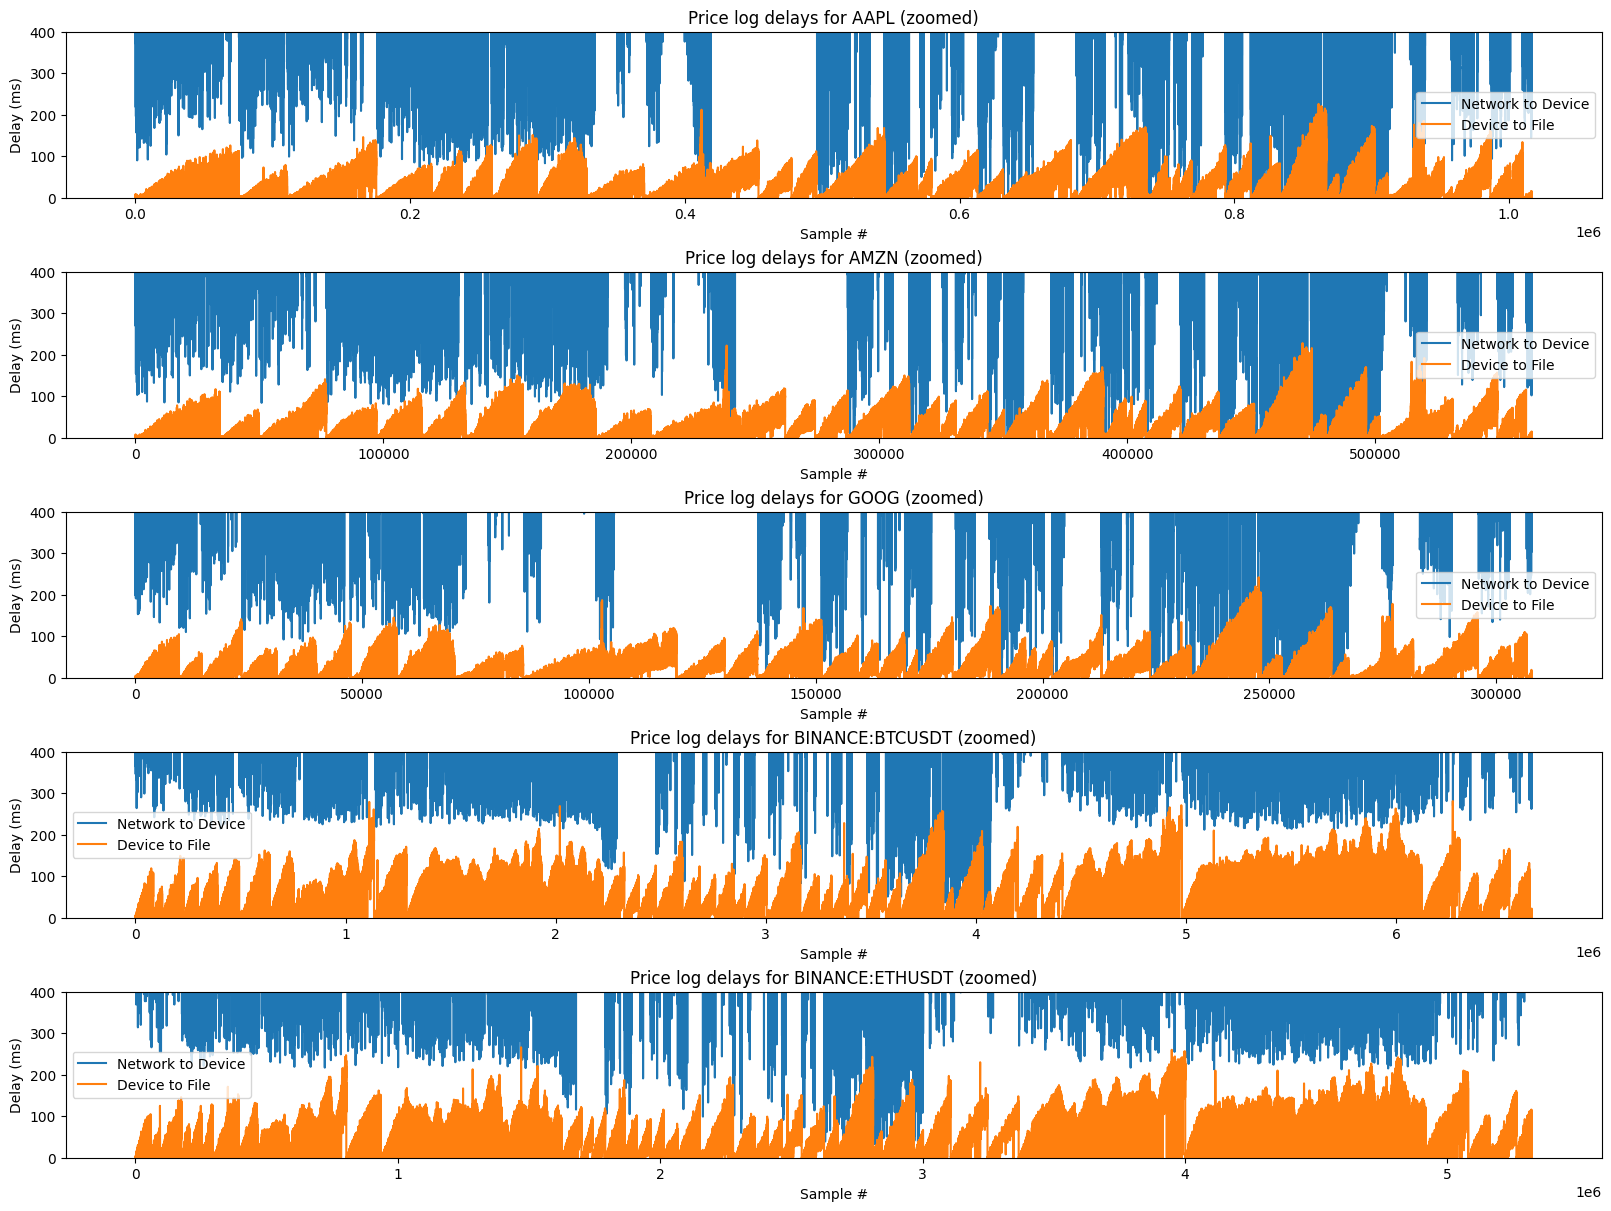

/tmp/ipykernel_79089/545497905.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig("graphs_zoomed.png")


In [41]:
fig, axs = plt.subplots(len(tickers), 1, figsize=(16, 12), layout="constrained")

for iticker in range(len(tickers)):
    this_ticker = tickers[iticker]

    prices_filename = os.path.join(os.getcwd(), f"out/PRICES_{timestamp}_{this_ticker}.txt")
    data = pd.read_csv(prices_filename, names=["p", "v", "rt", "pt", "wt"], on_bad_lines=lambda x: None, engine="python")

    network_delays = np.array(data["pt"]) - np.array(data["rt"])
    processing_delays = np.array(data["wt"]) - np.array(data["pt"])

    # tructate final 2 entries in case of not properly written data
    network_delays = network_delays[:-2]
    processing_delays = processing_delays[:-2]

    axs[iticker].plot(network_delays)
    axs[iticker].plot(processing_delays)
    
    axs[iticker].set_xlabel("Sample #")
    axs[iticker].set_ylabel("Delay (ms)")
    axs[iticker].legend(["Network to Device", "Device to File"])
    axs[iticker].set_ylim([0, 400])

    axs[iticker].set_title(f"Price log delays for {this_ticker} (zoomed)")

plt.show()
fig.savefig("graphs_zoomed.png")